# 🚀 Notebook de démarrage pour le machine learning

![Python for good](content/image.png)

*Meetup Python for Good du 28 février 2023 - [Meetup Python Grenoble](https://www.meetup.com/fr-FR/groupe-dutilisateurs-python-grenoble/) - [Data for Good](https://dataforgood.fr/)*

Ce notebook utilise un des jeux de données les **plus connus (toy dataset)** pour illuster la **classification** : le [jeu de données des iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

## 🏗️ Import des packages pour le machine learning

La bibliothèque [Scikit-Learn](https://scikit-learn.org/stable/) est la bibliothèque Python la plus utilisée pour faire du **machine learning**.

In [1]:
import sklearn

## 🗺️ Analyse exploratoire des données

L'objectif de cette partie est de **comprendre les données** que l'on va utiliser pour l'**entrainement** du modèle de machine learning (voir le notebook d'analyse de données).

⚠️ **Attention**, avant toute manipulation des données, il faut **mettre de côté** un jeu de données de test pour évaluer la **qualité du modèle** sur des données qu'il n'a **jamais vues**.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [4]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 👷 Pré-traitement des données

**Avant** de pouvoir être utilisées pour l'**entrainement du modèle**, les données doivent être **pré-traitées** : imputation des valeurs manquantes, passage des variables qualitatives en variables indicatrices (one hot encoding), standardisation...

In [7]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

In [8]:
numeric_features = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
# categorical_features = []

In [9]:
numeric_transformer = RobustScaler()
#categorical_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        #("cat", categorical_transformer, categorical_features),
    ]
)

## 🏃 Entrainement du modèle de machine learning

Pour pouvoir **estimer la qualité** d'un modèle de machine learning, il est intéressant d'avoir des **métriques de qualité** d'entrainement pour des **modèles simples**. Nous allons donc d'abord entrainer un **[modèle naïf](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)** puis un modèle simple de **[régression logistique](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)** et enfin un modèle ensembliste de **[random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)**.

ℹ️ L'utilisation d'un [pipeline Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) facilite l'utilisation du modèle et évite le **risque de fuite de données** depuis le jeu de test

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [11]:
dummy_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DummyClassifier())]
)
log_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)
rf_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier())]
)

In [12]:
dummy_pipeline.fit(X_train, y_train)
log_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['sepal length (cm)',
                                                   'sepal width (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)'])])),
                ('classifier', RandomForestClassifier())])

## 🧪 Evaluation du modèle de machine learning

Il existe **différentes manières** d'évaluer la **qualité** d'un modèle de **classification**. D'un **point de vue des données** prises **individuellement**, on peut utiliser la [matrice de confusion](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). Du point de vue **global**, on peut utiliser **différentes métriques** : [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [précision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [rappel](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [F1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)...

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Métriques du modèle naif
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.30      1.00      0.46        15
           2       0.00      0.00      0.00        16

    accuracy                           0.30        50
   macro avg       0.10      0.33      0.15        50
weighted avg       0.09      0.30      0.14        50



D:\__dossier_essais\MEETUP_PYTHON\février\Python-for-good\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\__dossier_essais\MEETUP_PYTHON\février\Python-for-good\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\__dossier_essais\MEETUP_PYTHON\février\Python-for-good\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

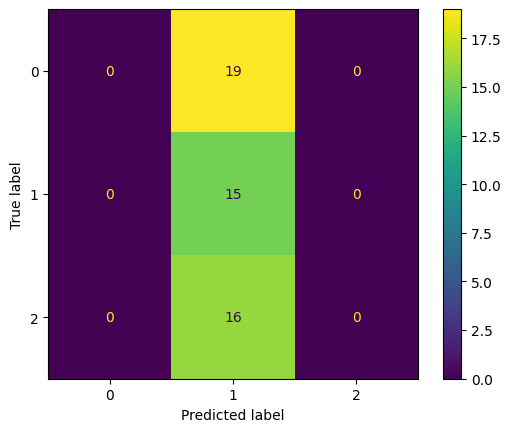

In [14]:
print("Métriques du modèle naif")
print(classification_report(y_test, dummy_pipeline.predict(X_test)))
ConfusionMatrixDisplay.from_predictions(y_test, dummy_pipeline.predict(X_test))
plt.show()

Métriques du modèle de régression logistique
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



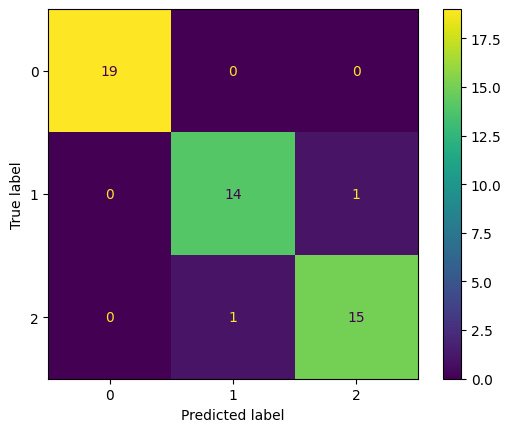

In [15]:
print("Métriques du modèle de régression logistique")
print(classification_report(y_test, log_pipeline.predict(X_test)))
ConfusionMatrixDisplay.from_predictions(y_test, log_pipeline.predict(X_test))
plt.show()

Métriques du modèle de random forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



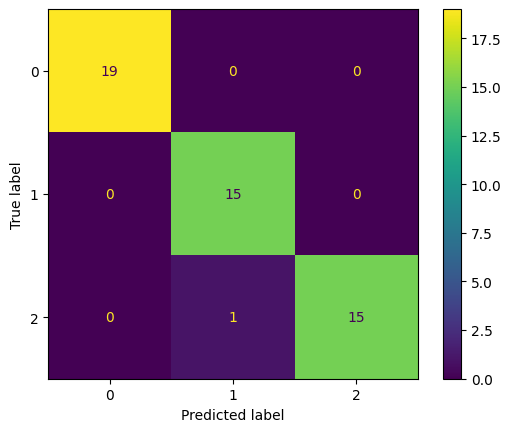

In [16]:
print("Métriques du modèle de random forest")
print(classification_report(y_test, rf_pipeline.predict(X_test)))
ConfusionMatrixDisplay.from_predictions(y_test, rf_pipeline.predict(X_test))
plt.show()

*Meetup Python for Good du 28 février 2023 - [Meetup Python Grenoble](https://www.meetup.com/fr-FR/groupe-dutilisateurs-python-grenoble/) - [Data for Good](https://dataforgood.fr/)*